## Case study: How does a bike-share navigate speedy success?

### Case Study Roadmap - Ask
#### Guiding questions 

● **What is the problem you are trying to solve?**

The primary problem to solve is understanding the differences in usage patterns between Cyclistic's annual members and casual riders. This insight will guide the development of targeted marketing strategies aimed at converting casual riders into annual members.

● **How can your insights drive business decisions?**

The insights will inform the marketing team on how to tailor campaigns that highlight the benefits of annual memberships, potentially increasing conversion rates from casual riders to members.

#### Key tasks 

● **Identify the business task**

Analyze the usage data to differentiate between the behaviors of annual members and casual riders.

● **Consider key stakeholders**

The primary stakeholders include the marketing team, led by Lily Moreno, and the Cyclistic executive team who will approve the strategies.

#### Deliverable 

● **A clear statement of the business task**

Understand and quantify the differences in bike usage patterns between annual members and casual riders to inform a marketing strategy aimed at increasing annual memberships.

#### Explanation:

**Directory Path:** Specify the directory where your CSV files are located (csv_dir).

**Loop through Files:** The script loops through each file in the directory and checks if it ends with .csv.

**Read and Append:** Each CSV file is read into a DataFrame and appended to a list.

**Concatenate:** The DataFrames in the list are concatenated into one DataFrame.

**Save to CSV:** The merged DataFrame is saved as merged_output.csv.

This code assumes all CSV files have the same structure (i.e., the same columns).

In [2]:
import os
import pandas as pd

# Define the path to the directory containing your CSV files
csv_dir = 'Data'

# Create an empty list to hold DataFrames
dataframes = []

# Loop through all the files in the directory
for file in os.listdir(csv_dir):
    if file.endswith('.csv'):
        file_path = os.path.join(csv_dir, file)
        # Read each CSV file and append the DataFrame to the list
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames in the list into one DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('TripData.csv', index=False)

print("All CSV files have been merged and saved as 'TripData.csv'.")


All CSV files have been merged and saved as 'TripData.csv'.


### EDA Steps Explained:

**Data Loading:** The data is loaded from TripData.csv into a DataFrame using pandas and located in a CSV file and loaded into memory.

**Basic Data Overview:** Use .info() and .head() to understand the structure and sample records of the dataset. The data is organized into columns with specific types (e.g., datetime, strings). The organization helps in identifying data types and missing values.

**Check for Missing Values:** Identify any missing values that might need to be addressed, which helps determine the data's credibility and integrity.

**Summary Statistics:** Generate descriptive statistics to understand distributions and ranges of numerical data, identifying outliers, inconsistencies, and basic insights.

**Data Cleaning:** Handle missing values and convert date columns to datetime objects for easier manipulation. Data cleaning is essential for ensuring the accuracy and credibility of the dataset.

**Feature Engineering:** Create new columns like trip_duration, start_day, start_month, and start_hour to provide more insights into the dataset. Feature engineering helps to better understand patterns related to time and trip duration, which is crucial for answering the primary business question.

**Data Distribution Analysis:** Visualize the distribution of different types of rides and member types. These visualizations help contextualize how different user types utilize the bike-sharing service.

**Trip Duration Analysis:** Compare trip durations across member types. This helps in understanding how casual riders differ from members, addressing the core business question.

**Temporal Analysis:** Analyze ride patterns across different days of the week and times of the day. Temporal patterns provide insight into user behavior, which can inform marketing strategies.

**Station Analysis:** Identify the most popular start stations to understand user preferences. Popular stations can provide insights into user preferences and help in optimizing operations or marketing efforts.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the data
df = pd.read_csv('/Users/ignaciobarrios/Desktop/CapStone Projects/Google Analytics/Data/TripData.csv')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [4]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5715688,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:27,2023-11-24 08:47:03,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,member
5715689,094A79892812BAB9,classic_bike,2023-11-06 09:07:20,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member
5715690,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:30,2023-11-10 19:44:28,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,-87.648855,41.935775,-87.663600,member
5715691,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:23,2023-11-27 09:13:23,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member
5715692,1FA95C375BE4B6A6,electric_bike,2023-11-20 16:16:03,2023-11-20 16:17:43,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877869,-87.654898,41.877642,-87.649618,member


In [5]:
# Step 2: Basic data overview
print("Basic Information:")
print(df.info())  # Information about data types and non-null counts

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715693 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 566.9+ MB
None


In [6]:
# Step 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947025
start_station_id      947025
end_station_name      989476
end_station_id        989476
start_lat                  0
start_lng                  0
end_lat                 7756
end_lng                 7756
member_casual              0
dtype: int64


In [7]:
# Count unique values per column
unique_counts = df.nunique()

# Display the counts
print("Unique values per column:")
print(unique_counts)

Unique values per column:
ride_id               5715482
rideable_type               3
started_at            5100086
ended_at              5107236
start_station_name       1705
start_station_id         1669
end_station_name         1719
end_station_id           1681
start_lat              756981
start_lng              722010
end_lat                  2229
end_lng                  2226
member_casual               2
dtype: int64


In [8]:
# Drop duplicates based on the 'ride_id' column
df = df.drop_duplicates(subset='ride_id', keep='first')

In [9]:
df.reset_index(drop=True)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715477,30B44BD4C16E688C,classic_bike,2023-11-24 08:39:27,2023-11-24 08:47:03,Clark St & Wellington Ave,TA1307000136,Southport Ave & Wellington Ave,TA1307000006,41.936497,-87.647539,41.935775,-87.663600,member
5715478,094A79892812BAB9,classic_bike,2023-11-06 09:07:20,2023-11-06 09:10:00,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member
5715479,F0A7DF8A44FDA3CB,electric_bike,2023-11-10 19:35:30,2023-11-10 19:44:28,Halsted St & Roscoe St,TA1309000025,Southport Ave & Wellington Ave,TA1307000006,41.943687,-87.648855,41.935775,-87.663600,member
5715480,4D5E3685BB913A3C,classic_bike,2023-11-27 09:11:23,2023-11-27 09:13:23,Aberdeen St & Jackson Blvd,13157,Peoria St & Jackson Blvd,13158,41.877726,-87.654787,41.877642,-87.649618,member


# Analyze

1. Convert ***started_at*** and ***ended_at*** to datetime:
It's crucial that these columns are in datetime format for the subtraction and day-of-week extraction to work properly.

2. Create the ***ride_length*** column:
By subtracting ***started_at*** from ***ended_at***, we get the ride duration in the form of a timedelta object.

3. Convert ***ride_length*** to seconds:
The ***ride_length_seconds*** column contains the ride duration in seconds, which can be useful for numerical analysis or aggregations like average ride time.

4. Format ***ride_length*** as HH:MM
We apply a lambda function to extract only the hours, minutes, and seconds from the timedelta object, excluding microseconds.

5. Create the ***day_of_week*** column:
The dt.weekday function returns values between 0 (Monday) and 6 (Sunday). Since the prompt expects Sunday as 1 and Saturday as 7, we add 1 to the result.


In [11]:
import pandas as pd

# Assuming df is your DataFrame with the relevant columns
# First, ensure 'started_at' and 'ended_at' columns are in datetime format
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

# Step 1: Create the ride_length column by subtracting 'started_at' from 'ended_at'
# The result will be a timedelta object
df['ride_length'] = df['ended_at'] - df['started_at']

# Step 2: Convert ride_length to total seconds for easier processing (optional)
# This gives you ride length in seconds, which can be useful for further analysis
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()

# Step 3: Format ride_length in HH:MM:SS using the timedelta format
# We'll keep it as a timedelta object since pandas stores it in this format
df['ride_length_formatted'] = df['ride_length'].apply(lambda x: str(x).split('.')[0])

# Step 4: Create the day_of_week column using the pandas dt.weekday method
# This will give values from 0 to 6 (Monday=0, Sunday=6), so we add 1 to match the Excel format
df['day_of_week'] = df['started_at'].dt.weekday + 1

# Step 5: Check the first few rows of the updated DataFrame to confirm the new columns
print(df[['ride_id', 'started_at', 'ended_at', 'ride_length_formatted', 'day_of_week']].head())


            ride_id          started_at            ended_at  \
0  4449097279F8BBE7 2023-10-08 10:36:26 2023-10-08 10:49:19   
1  9CF060543CA7B439 2023-10-11 17:23:59 2023-10-11 17:36:08   
2  667F21F4D6BDE69C 2023-10-12 07:02:33 2023-10-12 07:06:53   
3  F92714CC6B019B96 2023-10-24 19:13:03 2023-10-24 19:18:29   
4  5E34BA5DE945A9CC 2023-10-09 18:19:26 2023-10-09 18:30:56   

  ride_length_formatted  day_of_week  
0       0 days 00:12:53          7.0  
1       0 days 00:12:09          3.0  
2       0 days 00:04:20          4.0  
3       0 days 00:05:26          2.0  
4       0 days 00:11:30          1.0  
            ride_id  rideable_type          started_at            ended_at  \
0  4449097279F8BBE7   classic_bike 2023-10-08 10:36:26 2023-10-08 10:49:19   
1  9CF060543CA7B439  electric_bike 2023-10-11 17:23:59 2023-10-11 17:36:08   
2  667F21F4D6BDE69C  electric_bike 2023-10-12 07:02:33 2023-10-12 07:06:53   
3  F92714CC6B019B96   classic_bike 2023-10-24 19:13:03 2023-10-24 19:18:29 

In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds,ride_length_formatted,day_of_week
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53,773.0,0 days 00:12:53,7.0
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09,729.0,0 days 00:12:09,3.0
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20,260.0,0 days 00:04:20,4.0
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26,326.0,0 days 00:05:26,2.0
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30,690.0,0 days 00:11:30,1.0


Basic Calculations:
                               Calculation         Value
0               Mean Ride Length (seconds)  1.046769e+03
1                Max Ride Length (seconds)  5.909344e+06
2  Mode Day of Week (1=Sunday, 7=Saturday)  3.000000e+00


/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_8156/1489008663.py:24: FutureWarning: The provided callable <function mean at 0x106742020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_avg_ride_length = pd.pivot_table(df, values='ride_length_seconds', index='member_casual', aggfunc=np.mean)
/var/folders/0g/l4d30qyn5j7d341wrkwy65bc0000gn/T/ipykernel_8156/1489008663.py:27: FutureWarning: The provided callable <function mean at 0x106742020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_avg_ride_length_by_day = pd.pivot_table(df, values='ride_length_seconds', index='member_casual', columns='day_of_week', aggfunc=np.mean)



Average Ride Length for Members and Casual Riders:
               ride_length_seconds
member_casual                     
casual                 1612.569018
member                  764.416637

Average Ride Length by Day of Week:
day_of_week            1.0          2.0          3.0          4.0  \
member_casual                                                       
casual         1576.077234  1398.506626  1360.720115  1398.283452   
member          733.185875   740.681521   745.380436   729.181985   

day_of_week            5.0          6.0          7.0  
member_casual                                         
casual         1556.658640  1827.563244  1936.074193  
member          749.229149   844.462884   847.574299  

Ride Count by Day of Week:
day_of_week       1.0     2.0     3.0     4.0     5.0     6.0     7.0
member_casual                                                        
casual         157781  167680  180653  179332  210640  286510  234173
member         384044  454570  47472

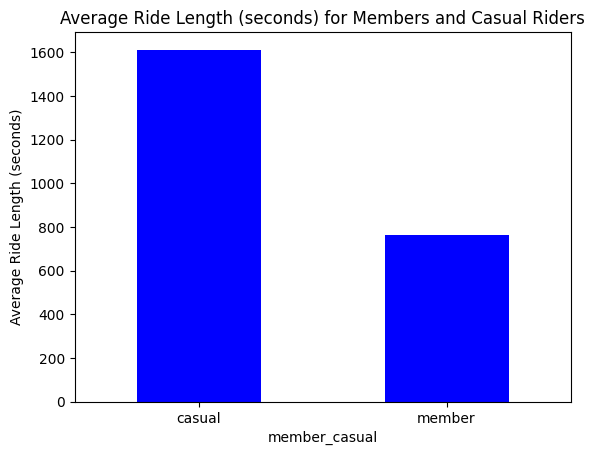

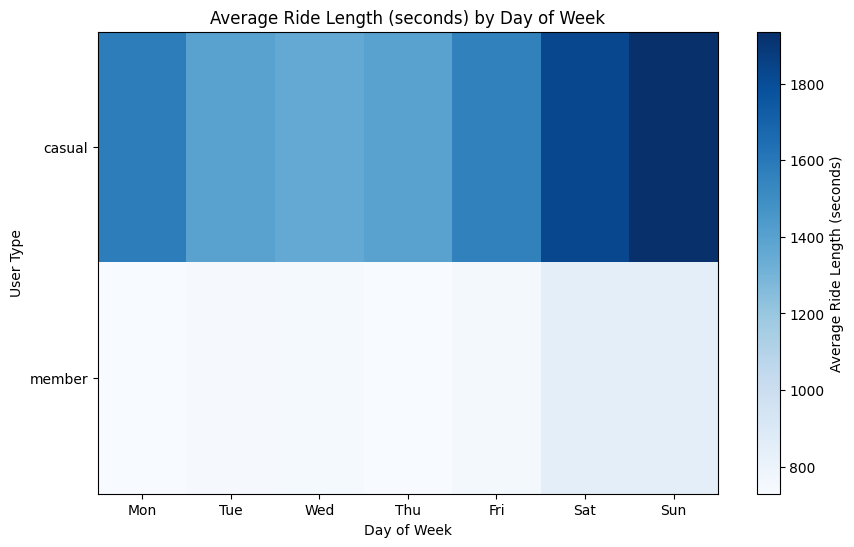

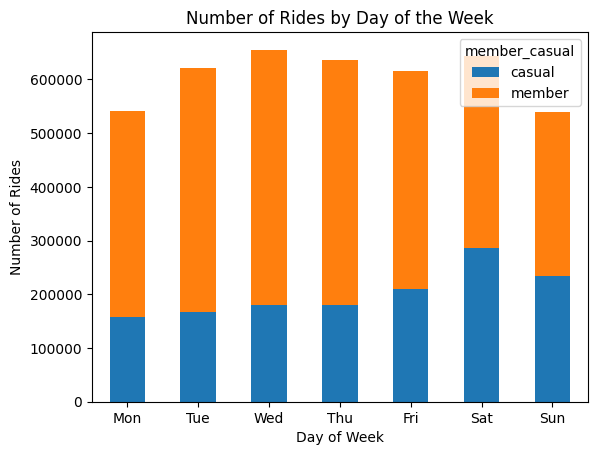

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data into a DataFrame (assuming df is your DataFrame with necessary columns)

# Step 1: Basic Calculations
mean_ride_length = df['ride_length_seconds'].mean()
max_ride_length = df['ride_length_seconds'].max()
mode_day_of_week = df['day_of_week'].mode()[0]

# Display basic calculations
calculations = {
    'Mean Ride Length (seconds)': mean_ride_length,
    'Max Ride Length (seconds)': max_ride_length,
    'Mode Day of Week (1=Sunday, 7=Saturday)': mode_day_of_week
}
calculations_df = pd.DataFrame(list(calculations.items()), columns=['Calculation', 'Value'])
print("Basic Calculations:")
print(calculations_df)

# Step 2: Create a pivot table
# Average ride_length for members and casual riders
pivot_avg_ride_length = pd.pivot_table(df, values='ride_length_seconds', index='member_casual', aggfunc=np.mean)

# Average ride_length by day_of_week
pivot_avg_ride_length_by_day = pd.pivot_table(df, values='ride_length_seconds', index='member_casual', columns='day_of_week', aggfunc=np.mean)

# Number of rides by day_of_week
pivot_ride_count_by_day = pd.pivot_table(df, values='ride_id', index='member_casual', columns='day_of_week', aggfunc='count')

# Display pivot tables
print("\nAverage Ride Length for Members and Casual Riders:")
print(pivot_avg_ride_length)

print("\nAverage Ride Length by Day of Week:")
print(pivot_avg_ride_length_by_day)

print("\nRide Count by Day of Week:")
print(pivot_ride_count_by_day)

# Step 3: Create charts for better visualization

# Bar chart for average ride length for members vs casual riders
pivot_avg_ride_length.plot(kind='bar', legend=False, color=['blue', 'orange'])
plt.title('Average Ride Length (seconds) for Members and Casual Riders')
plt.ylabel('Average Ride Length (seconds)')
plt.xticks(rotation=0)
plt.show()

# Heatmap for average ride length by day of the week
plt.figure(figsize=(10, 6))
plt.title('Average Ride Length (seconds) by Day of Week')
plt.imshow(pivot_avg_ride_length_by_day, cmap='Blues', aspect='auto')
plt.colorbar(label='Average Ride Length (seconds)')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(ticks=[0, 1], labels=pivot_avg_ride_length_by_day.index)
plt.xlabel('Day of Week')
plt.ylabel('User Type')
plt.show()

# Bar chart for the number of rides by day of the week
pivot_ride_count_by_day.T.plot(kind='bar', stacked=True)
plt.title('Number of Rides by Day of the Week')
plt.ylabel('Number of Rides')
plt.xlabel('Day of Week')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


# Conclusions:

### 1. **How do annual members and casual riders use Cyclistic bikes differently?**

Based on the data:

- **Ride Length:** Casual riders tend to have significantly longer ride lengths (averaging 1,612 seconds or about 27 minutes) compared to annual members (averaging 764 seconds or about 13 minutes). This suggests that casual riders may be using the bikes more for leisure or longer trips, while annual members likely use them for shorter, more practical commutes.

- **Day of Week Usage:** Casual riders show increased activity on weekends, particularly on Saturday and Sunday, with the longest average ride lengths happening on those days (1,936 seconds and 1,827 seconds, respectively). Annual members have relatively consistent ride lengths throughout the week, with slightly higher activity on weekends, but the variation is less pronounced. This indicates that casual riders are more likely to use the bikes for weekend outings or recreational purposes, while members use the bikes more consistently during the workweek.

### 2. **Why would casual riders buy Cyclistic annual memberships?**

Casual riders could be incentivized to switch to annual memberships for several reasons:

- **Cost savings for frequent use:** If casual riders are using the bikes regularly on weekends or for long trips, they might save money by purchasing an annual membership instead of paying for individual rides.

- **Convenience:** Members benefit from a hassle-free experience, avoiding the need to purchase single or day passes each time they ride. This convenience could appeal to casual riders who find themselves riding often, even if mostly for leisure.

- **Flexibility for different needs:** By offering a membership plan that suits both commuters and leisure users, Cyclistic can target casual riders who might want the flexibility to ride more frequently without additional costs or restrictions.

### 3. **How can Cyclistic use digital media to influence casual riders to become members?**

Cyclistic can use digital media strategies to convert casual riders to members by:

- **Targeted promotions on weekends:** Since casual riders have longer rides on weekends, Cyclistic could offer special promotions or discounts on memberships to weekend riders through targeted ads or in-app notifications during peak usage times.

- **Highlighting cost savings:** Digital ads and social media campaigns should focus on how annual memberships offer a better deal for frequent riders, emphasizing the savings over time compared to individual ride payments.

- **Leveraging customer testimonials and social proof:** Cyclistic could use digital platforms to showcase stories or reviews from current annual members, particularly those who transitioned from being casual riders. Testimonials can focus on the benefits of membership in terms of convenience, savings, and overall experience.

- **Utilizing data-driven personalization:** By analyzing ride history, Cyclistic can send personalized offers or reminders to casual riders who are nearing a certain usage threshold, encouraging them to switch to a membership plan that would better suit their riding patterns.